# Python & Numpy #

Objectives: get familiar with some important aspects of Python 3 and in particular see how to replace python loops with vectorised operations using the numpy library.

> **Instructions:** <br>
> - Ensure your Python environment is setup correctly, in particular Jupyter package is installed.<br>As we progress through this module, you may be required to install additional packages.
> - Prior to this tutorial, read the entire notebook and attempt all coding exercises.
> - To complete the coding exercises, write some python code between<br>`### INPUT YOUR CODE HERE ###` and `### END OF YOUR CODE SEGMENT ###`.<br> We will generally provide a rough estimate of the number of lines to write.
? - Run cells by pressing `Shift+Enter` and verify that your results are consistent with unit tests.

Upon completion of this tutorial, you ought to be familiar with vectorisation in numpy.

> <font color='darkgreen'>**Exercise 1:**</font> Test your Python 3 runtime.

***
## A. Numpy ##

[Numpy](http://www.numpy.org) is an optimised and well maintained scientific computing package for Python. Most math functions have numpy equivalents that accept arrays as input, for example `np.exp(.)` is the numpy equivalent of `math.exp(.)`. You will now implement a function to apply the sigmoid function $\sigma(x) = \frac{1}{1+e^{-x}}$ to an array of scalars. This symmetric function is highly non-linear and maps scalar values to the interval (0,1). It is also referred to as the logistic function and is frequently used in machine learning and deep learning. You will use it in the next tutorial to carry out a simple regression classification task on images.

Let $x=(x_1, x_2, \dots, x_n)$ be a row vector then `np.exp(x)` will apply the exponential function to every element of $x$, with the resulting vector $(e^{x_1}, e^{x_2}, \ldots, e^{x_n})$

In [1]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)

x = np.array([0, 1, 2])
print(np.exp(x))

[1.   2.72 7.39]


In addition, if $x$ is a vector then a Python operation such as $\frac{1}{2 x + 1}$ will output a vector of the same size as $x$.

In [2]:
# numpy vector operation
x = np.array([0, 0.2, -0.1])
print(1 / (2 * x + 0.1))

[ 10.   2. -10.]


> <font color='darkgreen'>**Exercise 2:**</font> Implement the sigmoid function using numpy. 

In [3]:
import numpy as np # for easy access to numpy functions

# Sigmoid vectorial function

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- scalar or numpy array of any size

    Returns:
    s -- sigmoid(x)
    """
    
    ### INPUT YOUR CODE HERE ### (1 line)
    s=1/(1+np.exp(-x))
    ### END OF YOUR CODE SEGMENT ###  
    
    return s

In [4]:
sigmoid(np.array([0, 1, 2]))

array([0.5 , 0.73, 0.88])

> ***Expected Output:***
>
> `array([0.5 , 0.73, 0.88])`

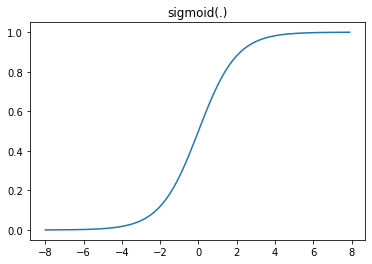

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-8, 8, 0.1)
plt.plot(x,sigmoid(x))
_ = plt.title('sigmoid(.)')

Optimisation of loss functions using back-propagation requires the computation of gradients. This is the backbone of a training process in deep learning. 

> <font color='darkgreen'>**Exercise 3:**</font> Let's now code the gradient function for the sigmoid map given by $\frac{d}{dx} \sigma(x) =\sigma'(x) = \sigma(x) (1 - \sigma(x))$

In [6]:
def grad_sigmoid(x):
    """
    Compute the gradient of the sigmoid function with respect to its input x
    
    Arguments:
    x -- A scalar or numpy array

    Returns:
    ds -- Your computed gradient
    """
    
    ### INPUT YOUR CODE HERE ### (2 lines)
    s = sigmoid(x)
    ds = s*(1-s)
    ### END OF YOUR CODE SEGMENT ###  
    
    return ds

In [7]:
print("grad_sigmoid = " + str(grad_sigmoid(np.array([1, 2, 3]))))

grad_sigmoid = [0.2  0.1  0.05]


> ***Expected Output:***
>
> `grad_sigmoid = [0.2  0.1  0.05]`

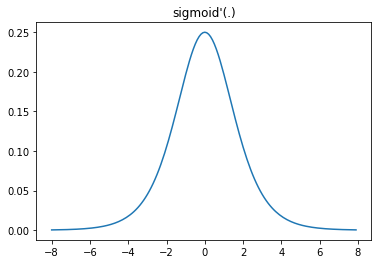

In [8]:
import matplotlib.pyplot as plt

x = np.arange(-8, 8, 0.1)
plt.plot(x,grad_sigmoid(x),'-')
_ = plt.title('sigmoid\'(.)')

***
### A.1 Reshaping Arrays ###

Another very common operation in deep learning is the manipulation of arrays. For example, converting a tensor input of dimension $(W,H,D)$ to a column vector of size $(W\times H\times D, 1)$. Such unrolling operation is very frequent and referred to as reshaping. Numpy provides two useful functions for these tasks:

- `np.shape`: to query the dimension
- `np.reshape()`: to reinterpret array with different dimensions

<img src="figs/reshape.png" alt="Image Reshape" width="500"/>

An image is typically represented as a 3D tensor of shape $(W,H,D)$ which may need to be rearranged as vector of $(W\times H\times D, 1)$ elements.

> <font color='darkgreen'>**Exercise 4:**</font> Implement the function `im2vec()` that takes an input of shape $(W, H, 3)$ and returns a column vector of shape $(W\times H\times 3,1)$.

In [9]:
def im2vec(image):
    """
    Argument:
    image -- a numpy array of shape (W, H, D)
    
    Returns:
    v -- a column vector of shape (W*H*D, 1)
    """
    
    ### INPUT YOUR CODE HERE ### (1 line)
    
    v=image.reshape(image.shape[0]*image.shape[1] *image.shape[2], 1)
    ### END OF YOUR CODE SEGMENT ###  
    
    return v

In [10]:
# 2x2 RGB image
image = np.array([
    [[ 0.2, 0.1, 0.8],
     [ 0.8, 0.7, 0.5]],
    
    [[ 0.4, 0.2, 0.7],
     [ 0.5, 0.3, 0.2]]])

print("image.shape = {}".format(image.shape))
print("im2vec(image).shape = {}".format(im2vec(image).shape))
print("im2vec(image).T = {}".format(im2vec(image).T))

image.shape = (2, 2, 3)
im2vec(image).shape = (12, 1)
im2vec(image).T = [[0.2 0.1 0.8 0.8 0.7 0.5 0.4 0.2 0.7 0.5 0.3 0.2]]


> ***Expected Output:***
>
> `image.shape = (2, 2, 3)
im2vec(image).shape = (12, 1)
im2vec(image).T = [[0.2 0.1 0.8 0.8 0.7 0.5 0.4 0.2 0.7 0.5 0.3 0.2]]`

***
### A.2 Normalisation of Data ###

Normalisation of data is an important pre-processing step in deep learning. It often yields better performance with faster algorithm convergence and better optimisation results. A typical strategy consists in setting input vectors to unit value. Given an input vector $x$, the normalised vector is given by $\frac{x}{\|x\|}$.

If your data samples are organised as row or column entries in a matrix, you can use `np.linalg.norm(.)` and specify the axis along which you want to compute the norm. For example:

$$
X = 
\begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6
\end{bmatrix}
$$

then 

$$
\|X\| = 
\mbox{np.linalg.norm(X, axis=1, keepdims=True)} = \begin{bmatrix}
    \sqrt{15} \\
    \sqrt{77} \\
\end{bmatrix}
$$

and 

$$
X'=\frac{X}{\|X\|}=\begin{bmatrix}
    \frac{1}{\sqrt{15}} & \frac{2}{\sqrt{15}} & \frac{3}{\sqrt{15}} \\
    \frac{4}{\sqrt{77}} & \frac{5}{\sqrt{77}} & \frac{6}{\sqrt{77}}
\end{bmatrix}
$$

Note that although $X$ is a $2\times 3$ matrix and $\| X\|$ is $2\times 1$,
numpy permits the division of $X$ by $\| X\|$ using a mechanism called [broadcasting](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). It is useful when performing operations between arrays of different shapes.

> <font color='darkgreen'>**Exercise 5:**</font> Implement `normalise()` such that each row of the input X are unit length.

In [11]:
def normalise(X):
    """
    Normalises each row of the matrix X to unit length
    
    Argument:
    X -- A numpy matrix of shape (n, m)
    
    Returns:
    X -- The modified and normalised numpy matrix X
    """
    
    ### INPUT YOUR CODE HERE ### (2 lines)
    X_norm = np.linalg.norm(X, ord=2, axis=1, keepdims=True)
    X = X/X_norm
    ### END OF YOUR CODE SEGMENT ### 

    return X

In [12]:
X = np.array([[1, 2, 3], [4, 5, 6]])

print("normalised X.shape = {}".format(normalise(X).shape))
print("normalised X = {}".format(normalise(X)))
assert(np.sum(np.linalg.norm(normalise(X),axis=1))==2.0)

normalised X.shape = (2, 3)
normalised X = [[0.27 0.53 0.8 ]
 [0.46 0.57 0.68]]


>***Expected Output:***
>
> `normalised X.shape = (2, 3)
normalised X = [[0.27 0.53 0.8 ]
 [0.46 0.57 0.68]]`

An important normalisation function used in multi-dimensional classification problems is called the softmax function. Formally if $x\in \mathbb{R}^{1\times n}$, the softmax function is defined as

$$\mbox{softmax}(x) = \left[\frac{e^{x_1}}{\sum_{i=1}^n e^{x_i}},\frac{e^{x_2}}{\sum_{i=1}^n e^{x_i}},\ldots,\frac{e^{x_n}}{\sum_{i=1}^n e^{x_i}}\right]$$ 

> <font color='darkgreen'>**Exercise 6:**</font> Implement the softmax function using numpy.

In [13]:
def softmax(X):
    """Softmax for each row of the input X of shape (n, m)

    Argument:
    X -- A numpy matrix of shape (n,m)

    Returns:
    S -- A numpy matrix of shape (n,m) equal to the softmax of X
    """
    
    ### INPUT YOUR CODE HERE ### (3 lines)
    X_exp = np.exp(X)
    X_sum = np.sum(X_exp, axis=1, keepdims=True)
    S = X_exp/X_sum
    
    
    #S= np.exp(X) / np.sum(np.exp(X), axis=0) 
    ### END OF YOUR CODE SEGMENT ### 
    
    return S

In [14]:
X = np.array([[3, 0, 6],[8, 8, 0]])
print("softmax = {}".format(softmax(X)))

softmax = [[0.05 0.   0.95]
 [0.5  0.5  0.  ]]


>***Expected Output:***
>
>`softmax = [[0.05 0.   0.95]
 [0.5  0.5  0.  ]]`

**Note**
- You could do a sanity check and verify that each row sums up to 1 with numpy function `np.sum(softmax(X),1)`
- The softmax function allows us to interpret each row element as a probability.

***

## B. Vectorisation ##

Training deep learning models is generally performed on large datasets. To avoid severe performance bottlenecks, you must ensure your code runs efficiently. This is particularly important when using scripting languages such as Python where compiler optimisation is not available. One very important concept is called vectorisation. Evaluate and study the following code.

In [15]:
import time

x = [3, 8, 5, 0, 3, 9, 4, 0]
y = [1, 8, 2, 7, 4, 5, 7, 2]

### python outer product ###
delta_t1 = time.time()
for k in range(1000):
    outer1 = np.zeros((len(x),len(y))) 
    for i in range(len(x)):
        for j in range(len(y)):
            outer1[i,j] = x[i] * y[j]
delta_t1 = time.time() - delta_t1

### convert python array to np.array (row vector)
x = np.array(x)
x = x.reshape(1,np.prod(x.shape)) 
y = np.array(y)
y = y.reshape(1,np.prod(y.shape))

### numpy vectorised outer product ###
delta_t2 = time.time()
for k in range(1000):
    outer2 = x.T @ y
delta_t2 = time.time() - delta_t2

print("{:.2f} ms vs. {:.2f} ms".format(1000 * delta_t1, 1000 * delta_t2))
print("vectorised product is {:.1f}x faster!".format(delta_t1 / delta_t2))

diff = np.sum(outer1-outer2)
print("diff: " + str(diff))

30.45 ms vs. 1.99 ms
vectorised product is 15.3x faster!
diff: 0.0


Many linear operations such as the dot product of vectors can be expressed as matrix product. For example, if $x, y\in \mathbb{R}^{1\times n}$, $x\cdot y = x\, y^T \in \mathbb{R}$ provides the dot product and $x\otimes y=x^Ty \in \mathbb{R}^{n\times n}$ gives the outer product. Study the code below carefully.

In [16]:
print("x.shape={}".format(x.shape)) # (1x8) row vector
print("y.shape={}".format(x.shape)) # (1x8) row vector

### vectorised dot product ###
res = np.dot(x.flatten(),y.flatten())
res1 = np.matmul(x,y.T).reshape(1)
res2 = x @ y.T # preferred
assert(res == res1)
assert(res == res2)

### vectorised outer product ###
res = np.outer(x.flatten(),y.flatten())
res1 = np.matmul(x.T,y)
res2 = x.T @ y # preferred
assert(np.sum(res-res1) == 0)
assert(np.sum(res-res2) == 0)

### vectorised element-wise multiplication ###
res = np.multiply(x.flatten(),y.flatten())
res1 = x * y # preferred
assert(np.sum(res-res1) == 0)

### matrix/vector product ###
w = np.random.rand(2,x.shape[1]) # Random (2x8)
res = np.dot(w,x.flatten())
res1 = w @ x.T # preferred
assert(np.sum(res-res1) == 0)

x.shape=(1, 8)
y.shape=(1, 8)


A vectorized implementation is not only more elegant but also more efficient. This is particularly important for large matrices or vectors.

Use `np.multiply()` or simply `*` to perform an element-wise multiplication. Use `np.matmul()` or simply `@` to compute the product of matrices. `.T` returns the matrix transpose.

> <font color='darkgreen'>**Exercise 7:**</font> Let's now implement the $L_2$ loss function using numpy vectorised operations. The $L_2$ loss is an important performance measure for models in deep learning. A large loss means that your model predictions $\hat{y}$ are poor and far away from the ground truth $y$. Model parameters are generally optimised using gradient descent in an attempt to minimise the loss.
>
> Formally the $L_2$ loss is defined as $L_2(y,\hat{y})=\sum_{i=1}^m (\hat{y}^i-y^i)^2$
> 
> There are several ways to implement the $L_2$. As a reminder, if $x \in \mathbb{R}^{1\times n}$, then `np.dot(x,x)` = $\sum_{i=1}^n x_i^{2} = x\, x^T$. 

In [17]:
def L2(y,y_hat):
    """
    Arguments:
    y -- vector of size m (ground truth labels)
    y_hat -- vector of size m (predicted labels)

    
    Returns:
    loss -- L2 loss
    """
    
    ### INPUT YOUR CODE HERE ### (1 line)
    loss = np.sum(np.dot(y-y_hat, y-y_hat))
    ### END OF YOUR CODE SEGMENT ### 
    
    return loss

In [18]:
y_hat = np.array([.8, 0.3, 0.9, .2, .1])
y = np.array([1, 0, 1, 0, 0])
print("L2 = {:.2f}".format(L2(y,y_hat)))

L2 = 0.19


> ***Expected Output:***
>
> `L2 = 0.19`

Similarly, we can define  the $L_1$ loss as $L_1(y,\hat{y})=\sum_{i=1}^m |\hat{y}^i-y^i|$

> <font color='darkgreen'>**Exercise 8:**</font> Implement the numpy vectorized version of the $L_1$ loss.

In [19]:
def L1(y,y_hat):
    """
    Arguments:
    y -- vector of size m (ground truth labels)
    y_hat -- vector of size m (predicted labels)

    
    Returns:
    loss -- L1 loss
    """
    
    ### INPUT YOUR CODE HERE ### (1 line)
    loss = np.sum(np.abs(y-y_hat))
    ### END OF YOUR CODE SEGMENT ### 
    
    return loss

In [20]:
y_hat = np.array([.8, 0.3, 0.9, .2, .1])
y = np.array([1, 0, 1, 0, 0])
print("L1 = {:.2f}".format(L1(y,y_hat)))

L1 = 0.90


> ***Expected Output:***
>
> `L1 = 0.90`

<font color='darkblue'>**Take away:**</font>
- numpy mathematical functions are applied to `np.array` element by element.<br> numpy provides many functions such `np.dot`, `np.sum`, `np.maximum`, `np.abs`, `np.multiply`...
- use `np.reshape` to change the dimension of tensors and check tensor shapes with `np.shape`
- numpy broadcasting mechanism is very useful however practice plenty to use it correctly
- vectorisation provides compact code,  and elegance

-- EOF --